# Inference Risk examples

In [1]:
import os
import sys

#Append to PYTHONPATH
path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(path)

from leakpro.synthetic_data_attacks.anonymeter.evaluators.inference_evaluator import InferenceEvaluator
from leakpro.synthetic_data_attacks.inference_utils import inference_risk_evaluation_each_against_rest_columns, load_inference_results
from leakpro.synthetic_data_attacks.plots import plot_ir_each_against_rest_columns
from leakpro.tests.tests_synthetic_data_attacks.anonymeter_tests.fixtures import get_adult

#Get ori and syn
ori = get_adult(return_ori=True, n_samples=100)
syn = get_adult(return_ori=False, n_samples=100)

## Basic example

A very basic example requires an original (`ori`) and a synthetic (`syn`) pandas dataframes.

Afterwards, instantiate the evaluator and run `evaluate` and `print_results` methods.

**Note:** adjust `n_attacks` as needed, default value is `n_attacks=2_000`

In [2]:
evaluator = InferenceEvaluator(
    ori = ori,
    syn = syn,
    aux_cols = ["type_employer", "capital_loss", "hr_per_week", "age"],
    secret = "education",    
    n_attacks = 100
)
results = evaluator.evaluate()
results.print_results()

Success rate of main attack (and nr and total): 17.26%, 16, 100
Success rate of naive attack (and nr and total): 10.52%, 9, 100
Residual rate: 7.53%


# Inference risk evaluation each column against rest of columns

Perform an inference risk evaluation of each column as secret with rest of columns as auxiliary information. Requires an original (`ori`) and a synthetic (`syn`) pandas dataframes. In example, results are saved to `json` file to later plot them.

**Note:** adjust `n_attacks` as needed. Default values is: `n_attacks=2_000`

In [3]:
#Perform inference risk evaluation each column against rest of columns
inf_res = inference_risk_evaluation_each_against_rest_columns(
    dataset = 'adults',
    ori = ori,
    syn = syn,
    verbose = True,
    save_results_json = True,
    nr_attacks = 100
)


Running inference_risk_evaluation_each_against_rest_columns for `adults`
Finished age on ir_eval_each_against_rest_columns, progress: 7.14%
Finished type_employer on ir_eval_each_against_rest_columns, progress: 14.29%
Finished education on ir_eval_each_against_rest_columns, progress: 21.43%
Finished education_num on ir_eval_each_against_rest_columns, progress: 28.57%
Finished marital on ir_eval_each_against_rest_columns, progress: 35.71%
Finished occupation on ir_eval_each_against_rest_columns, progress: 42.86%
Finished relationship on ir_eval_each_against_rest_columns, progress: 50.0%
Finished race on ir_eval_each_against_rest_columns, progress: 57.14%
Finished sex on ir_eval_each_against_rest_columns, progress: 64.29%
Finished capital_gain on ir_eval_each_against_rest_columns, progress: 71.43%
Finished capital_loss on ir_eval_each_against_rest_columns, progress: 78.57%
Finished hr_per_week on ir_eval_each_against_rest_columns, progress: 85.71%
Finished country on ir_eval_each_agains

In [4]:
#Get inference risk results from json file
inf_res = load_inference_results(dataset="adults")

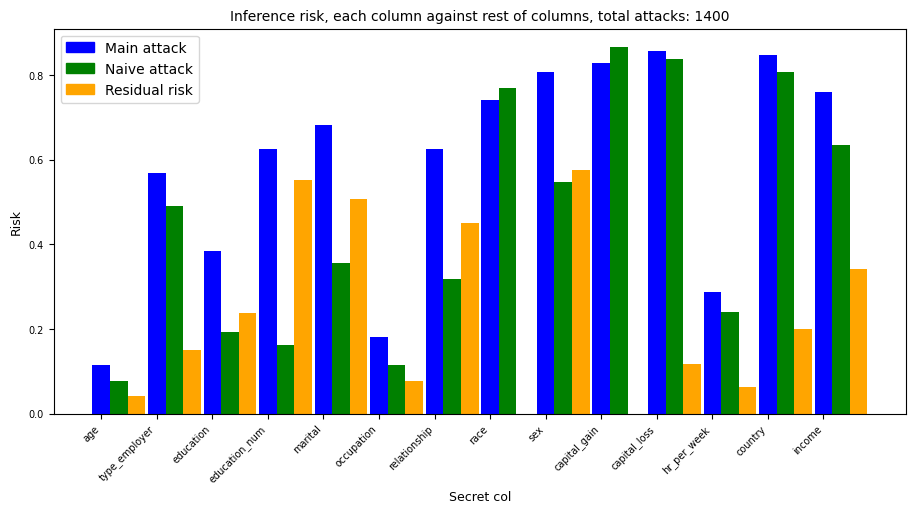

In [5]:
#Plot inference risk evaluation each column against rest of columns
plot_ir_each_against_rest_columns(inf_res=inf_res)